# K-Means Clustering

Group countries based on their GDP and Refugee Counts to identify clusters of similarity.

In [1]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import plotly.express as px
import pycountry

In [2]:
# Step 2: Load and Prepare Data
# Load dataset
df = pd.read_csv('combined.csv')

# Select relevant columns and handle missing values
clustering_data = df[['gdp', 'total_refugees']].dropna()

In [3]:
# Step 3: Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

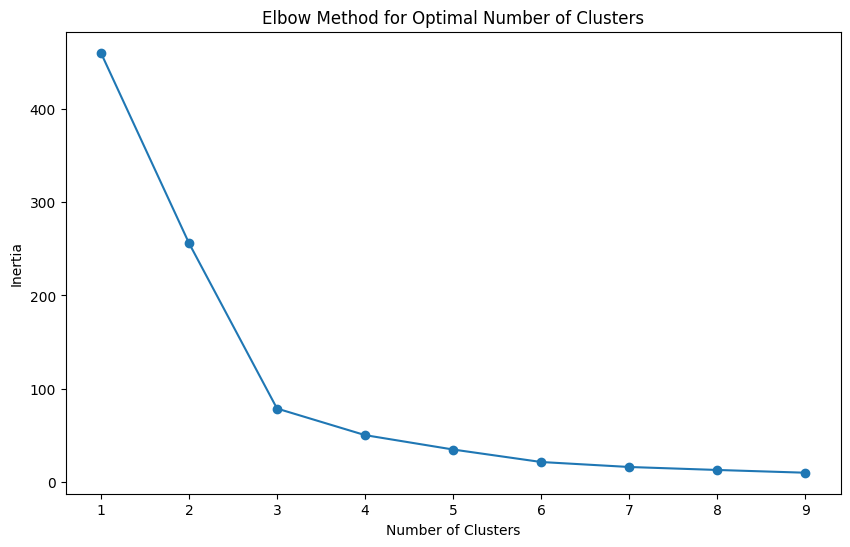

In [4]:
# Step 4: Determine Optimal Number of Clusters (Elbow Method)
inertia = []
cluster_range = range(1, 10)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [5]:
# Step 5: Apply K-Means Clustering (Choose optimal k, e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clustering_data['cluster'] = kmeans.fit_predict(scaled_data)

# Add cluster labels back to the original dataset
df.loc[clustering_data.index, 'cluster'] = clustering_data['cluster']

In [6]:
# Step 6: Analyze Cluster Statistics
cluster_summary = clustering_data.groupby('cluster').agg({
    'gdp': ['mean', 'median', 'min', 'max'],
    'total_refugees': ['mean', 'median', 'min', 'max'],
    'cluster': 'count'
}).rename(columns={'cluster': 'count'})

# Flatten MultiIndex columns
cluster_summary.columns = ['_'.join(col).strip() for col in cluster_summary.columns.values]
cluster_summary.rename(columns={'cluster_count': 'country_count'}, inplace=True)

# Display Cluster Statistics
print(cluster_summary)

             gdp_mean    gdp_median       gdp_min       gdp_max  \
cluster                                                           
0        1.402335e+12  1.243016e+12  1.216041e+11  3.965801e+12   
1        1.716628e+13  1.625397e+13  1.058193e+13  2.772071e+13   
2        4.035979e+12  4.004608e+12  3.537784e+12  4.525704e+12   

         total_refugees_mean  total_refugees_median  total_refugees_min  \
cluster                                                                   
0               6.577451e+04                35415.0                  15   
1               7.102665e+04                63492.0               20598   
2               1.354170e+06              1100567.0              906835   

         total_refugees_max  count_count  
cluster                                   
0                    413442          199  
1                    155551           23  
2                   2454276            8  


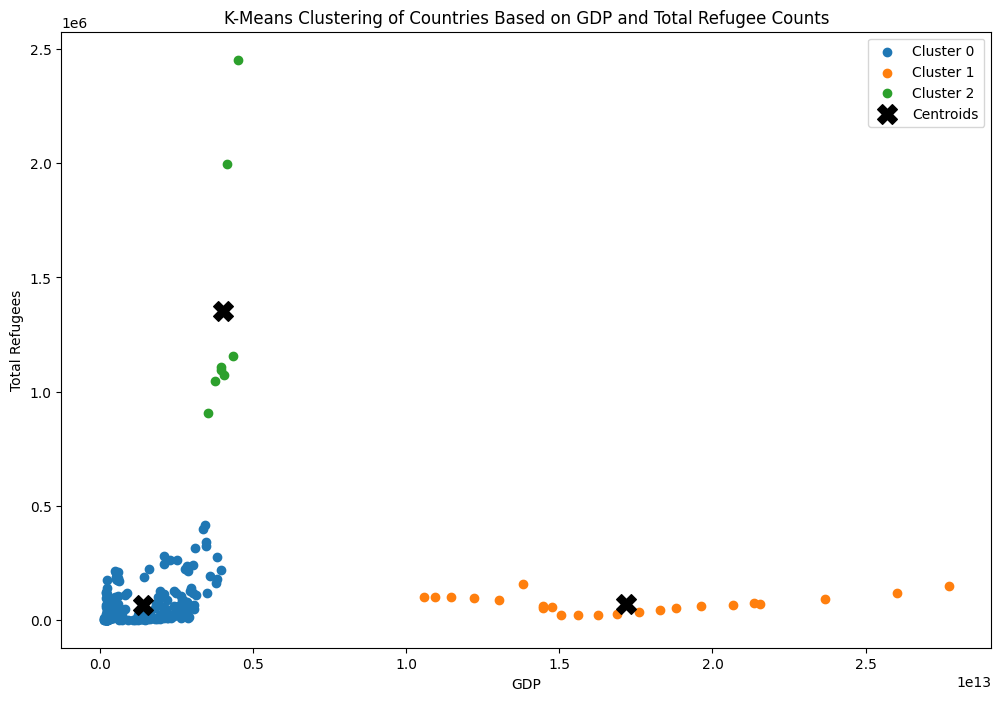

In [7]:
# Step 7: Visualize Clusters (Scatter Plot)
plt.figure(figsize=(12, 8))
for cluster in range(3):
    cluster_data = clustering_data[clustering_data['cluster'] == cluster]
    plt.scatter(cluster_data['gdp'], cluster_data['total_refugees'], label=f'Cluster {cluster}')

# Plot Cluster Centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='X', s=200, label='Centroids')

plt.title('K-Means Clustering of Countries Based on GDP and Total Refugee Counts')
plt.xlabel('GDP')
plt.ylabel('Total Refugees')
plt.legend()
plt.show()

In [8]:
# Step 8: Geographical Visualization with Plotly
df['iso_alpha'] = df['country_name'].apply(lambda x: pycountry.countries.lookup(x).alpha_3 if pd.notna(x) else None)
valid_data = df.dropna(subset=['iso_alpha'])

fig = px.choropleth(
    valid_data,
    locations='iso_alpha',
    color='cluster',
    hover_name='country_name',
    title='Geographical Distribution of K-Means Clusters Based on GDP and Total Refugee Counts',
    color_continuous_scale='viridis'
)
fig.show()

## Findings

<b>Cluster 0: Moderate GDP, Moderate Refugee Counts</b>
- Countries with moderate economic strength and refugee intake.

<b>Cluster 1: High GDP, Moderate Refugee Counts</b>
- Wealthy nations with robust economies.

<b>Cluster 2: Moderate GDP, Very High Refugee Counts</b>
- These countries face an overwhelming refugee amount despite having moderate economic resources.

<b>Real-World Interpretation</b>

Cluster 0: Countries that balance refugee intake within their economic constraints.

Cluster 1: Economically strong countries with well-managed refugee policies.

Cluster 2: Countries facing significant humanitarian and economic pressure due to large refugee populations.